In [247]:
# WeatherPy.ipynb
# Jack Cohen

# Dependencies
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from citipy import citipy as cp
from api_keys import weather_key

In [198]:
# Establish latitudes and longitudes to test
lats = 180*np.random.random_sample(1500)-90
longs = 360*np.random.random_sample(1500)-180

for i in range(len(longs)):
    lats[i]=round(lats[i],4)
    longs[i]=round(longs[i],4)

In [221]:
cities = []
city_list = []
j = 0
print("Beginning Data Retrieval")
print("------------------------")
for i in range(len(lats)):
    city_info = cp.nearest_city(lats[i],longs[i])
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city_info.city_name},{city_info.country_code}&appid={weather_key}&units=imperial'
    try: 
        data = req.get(url).json()
        if f'{city_info.city_name}, {city_info.country_code}' not in city_list:
            cities.append({'city':city_info.city_name,
                           'country':city_info.country_code.upper(),
                           'lat':data['coord']['lat'],
                           'lon':data['coord']['lon'],
                           'temp':data['main']['temp'],
                           'temp_min':data['main']['temp_min'],
                           'temp_max':data['main']['temp_max'],
                           'pressure':data['main']['pressure'],
                           'humidity':data['main']['humidity'],
                           'cloudiness':data['clouds']['all'],
                           'wind_speed':data['wind']['speed'],
                           'timestamp':data['dt']
                       })
            city_list.append(f'{city_info.city_name}, {city_info.country_code}')
            j = j+1
            print(f'Processing City {j} | {city_info.city_name}, {city_info.country_code}')
        else: continue
    except Exception as e:
        print(f'City not found. Skipping...')
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing City 1 | ushuaia, ar
Processing City 2 | ribeira grande, pt
Processing City 3 | hobart, au
Processing City 4 | jamestown, sh
Processing City 5 | college, us
Processing City 6 | barrow, us
Processing City 7 | palos verdes estates, us
Processing City 8 | ahipara, nz
Processing City 9 | wanning, cn
Processing City 10 | kapaa, us
Processing City 11 | kavaratti, in
Processing City 12 | matara, lk
Processing City 13 | rikitea, pf
Processing City 14 | georgetown, sh
Processing City 15 | torbay, ca
Processing City 16 | vila franca do campo, pt
Processing City 17 | kigoma, tz
Processing City 18 | sarangarh, in
Processing City 19 | ewa beach, us
Processing City 20 | pisco, pe
Processing City 21 | albany, au
Processing City 22 | agapovka, ru
Processing City 23 | nikolskoye, ru
Processing City 24 | dayong, cn
Processing City 25 | upernavik, gl
Processing City 26 | victoria, sc
Processing City 27 | cidreira, br

In [272]:
city_df = pd.DataFrame(data = cities)
city_df = city_df.rename(columns={"city": "City", 
                                  "country": "Country",
                                  "lat":"Latitude",
                                  "lon":"Longitude",
                                  "temp":"Temperature (F)",
                                  "temp_min":"Min Temperature (F)",
                                  "temp_max":"Max Temperature (F)",
                                  "humidity":"Humidity (%)",
                                  "cloudiness":"Cloudiness (%)",
                                  "wind_speed":"Wind Speed (mph)",
                                  "timestamp":"Date (UTC)",
                                  "pressure":"Pressure (hPa)"
                                 })
if len(city_df.loc[city_df['Humidity (%)']>100]) >0:
    print("Humidity value above 100%")
city_df.to_csv('city_data.csv', index=False)
date = datetime.utcfromtimestamp(int(city_df.describe().loc['mean','Date (UTC)']))

In [273]:
city_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (UTC)
0,ushuaia,AR,-54.8000,-68.3000,37.06,37.06,37.06,1018,93,90,8.05,1627421856
1,ribeira grande,PT,38.5167,-28.7000,72.28,72.28,72.28,1029,84,75,10.89,1627422145
2,hobart,AU,-42.8794,147.3294,52.03,49.26,55.26,984,81,75,1.99,1627421922
3,jamestown,SH,-15.9387,-5.7168,63.50,63.50,63.50,1021,69,45,21.81,1627422145
4,college,US,64.8569,-147.8028,63.81,61.23,65.59,1013,65,90,9.22,1627422146


In [274]:
city_df.describe()

,Latitude,Longitude,Temperature (F),Min Temperature (F),Max Temperature (F),Pressure (hPa),Humidity (%),Cloudiness (%),Wind Speed (mph),Date (UTC)
count,557.000000,557.000000,557.000000,557.00000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.005632,17.137822,68.733645,67.96395,69.470341,1011.865350,70.842011,54.788151,7.994039,1.627422e+09
std,33.306002,90.896933,14.057714,13.87646,14.546231,7.321116,20.793957,38.754740,5.358398,1.269995e+02
min,-54.800000,-179.166700,34.070000,34.07000,34.070000,984.000000,6.000000,0.000000,0.000000,1.627422e+09
25%,-9.443100,-63.141400,58.150000,57.52000,58.660000,1008.000000,60.000000,16.000000,3.670000,1.627422e+09
50%,20.894700,21.513600,70.000000,68.76000,70.540000,1013.000000,76.000000,67.000000,7.050000,1.627422e+09
75%,47.866700,96.110000,79.090000,78.66000,79.900000,1016.000000,87.000000,94.000000,11.390000,1.627422e+09
max,78.218600,179.316700,107.740000,107.74000,107.740000,1034.000000,100.000000,100.000000,27.630000,1.627422e+09


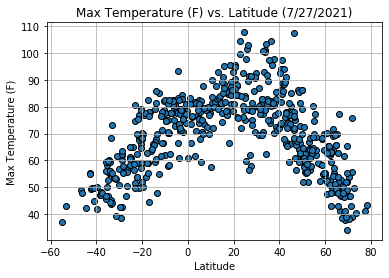

In [275]:
# Plot Temperature (F) vs Latitude
plt.scatter(city_df['Latitude'],city_df['Max Temperature (F)'],marker = 'o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f'Max Temperature (F) vs. Latitude ({date.month}/{date.day}/{date.year})')
plt.savefig('maxtemp_vs_lat.png')
plt.show()

# This plot shows how max temperature (for current day) changes with latitude for the cities in the dataset

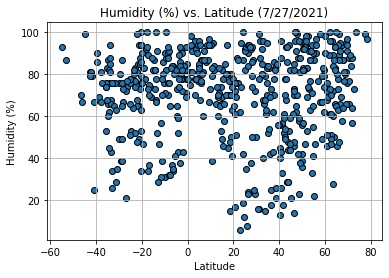

In [276]:
# Plot Humidity (%) vs Latitude
plt.scatter(city_df['Latitude'],city_df['Humidity (%)'],marker = 'o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f'Humidity (%) vs. Latitude ({date.month}/{date.day}/{date.year})')
plt.savefig('humidity_vs_lat.png')
plt.show()

# This plot shows how humidity (for current day) changes with latitude for the cities in the dataset

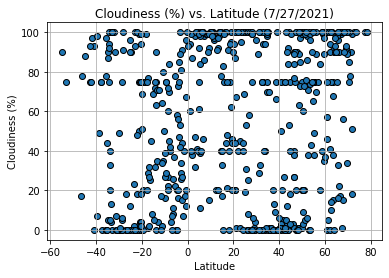

In [277]:
# Plot Cloudiness (%) vs Latitude
plt.scatter(city_df['Latitude'],city_df['Cloudiness (%)'],marker = 'o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f'Cloudiness (%) vs. Latitude ({date.month}/{date.day}/{date.year})')
plt.savefig('cloudiness_vs_lat.png')
plt.show()

# This plot shows how cloudiness (for current day) changes with latitude for the cities in the dataset

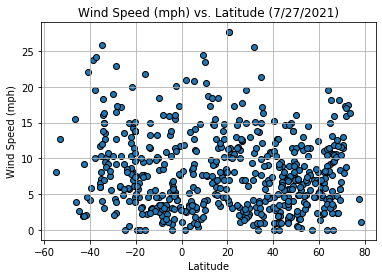

In [278]:
# Plot Wind Speed (mph) vs Latitude
plt.scatter(city_df['Latitude'],city_df['Wind Speed (mph)'],marker = 'o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title(f'Wind Speed (mph) vs. Latitude ({date.month}/{date.day}/{date.year})')
plt.savefig('wind_speed_vs_lat.png')
plt.show()

# This plot shows how wind speed (for current day) changes with latitude for the cities in the dataset